# Tent & Norm Adaptation

In [24]:
import pandas as pd

record = pd.read_csv('./result/audio-mnist/cnn/pre_train/training_records.csv')
record.head()

,Unnamed: 0,type,step,accuracy,loss
0,0,train,0,20.3125,2.294947
1,1,train,1,23.4375,2.296986
2,2,train,2,14.0625,2.294223
3,3,train,3,9.3750,2.294045
4,4,train,4,14.0625,2.297072


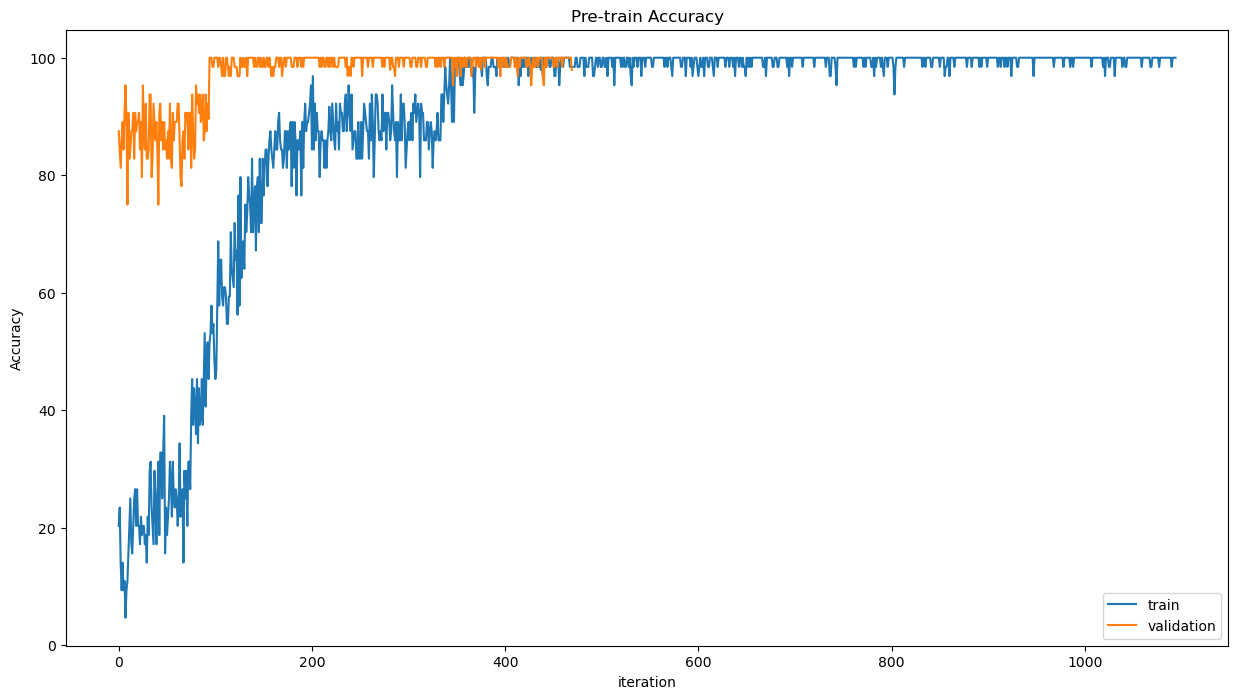

In [25]:
import matplotlib.pyplot as plt

train_record = record[record['type'] == 'train']
val_record = record[record['type'] == 'validation']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='train')
plt.plot(val_record['step'], val_record['accuracy'], label='validation')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

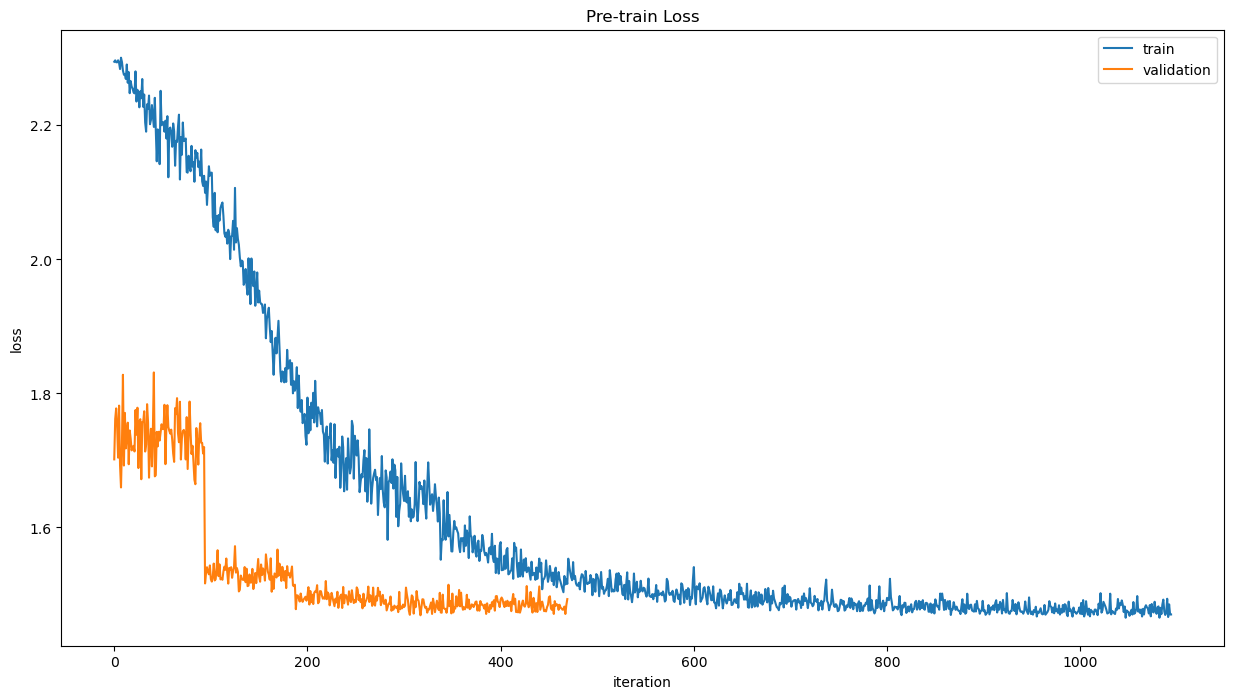

In [26]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='train')
plt.plot(val_record['step'], val_record['loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test-Time Training (TTT)

In [27]:
record = pd.read_csv('./result/audio-mnist/ttt/pre_time_shift_train/accu_record.csv')
record.head()

,Unnamed: 0,dataset,type,step,accuracy,loss
0,0,audio-mnist,cls,0,12.500000,2.281168
1,1,audio-mnist,ssh,0,41.666667,1.087021
2,2,audio-mnist,cls,1,8.333333,2.341804
3,3,audio-mnist,ssh,1,70.833333,0.826724
4,4,audio-mnist,cls,2,18.750000,2.273744


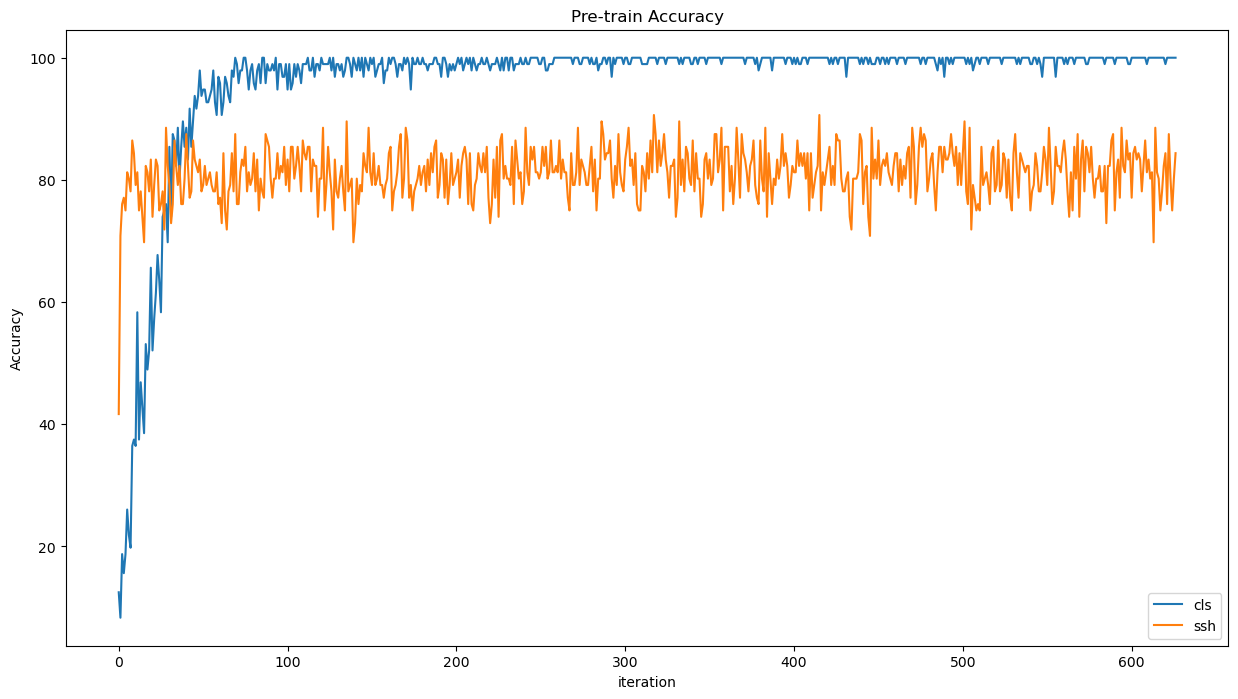

In [28]:
train_record = record[record['type'] == 'cls']
val_record = record[record['type'] == 'ssh']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='cls')
plt.plot(val_record['step'], val_record['accuracy'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

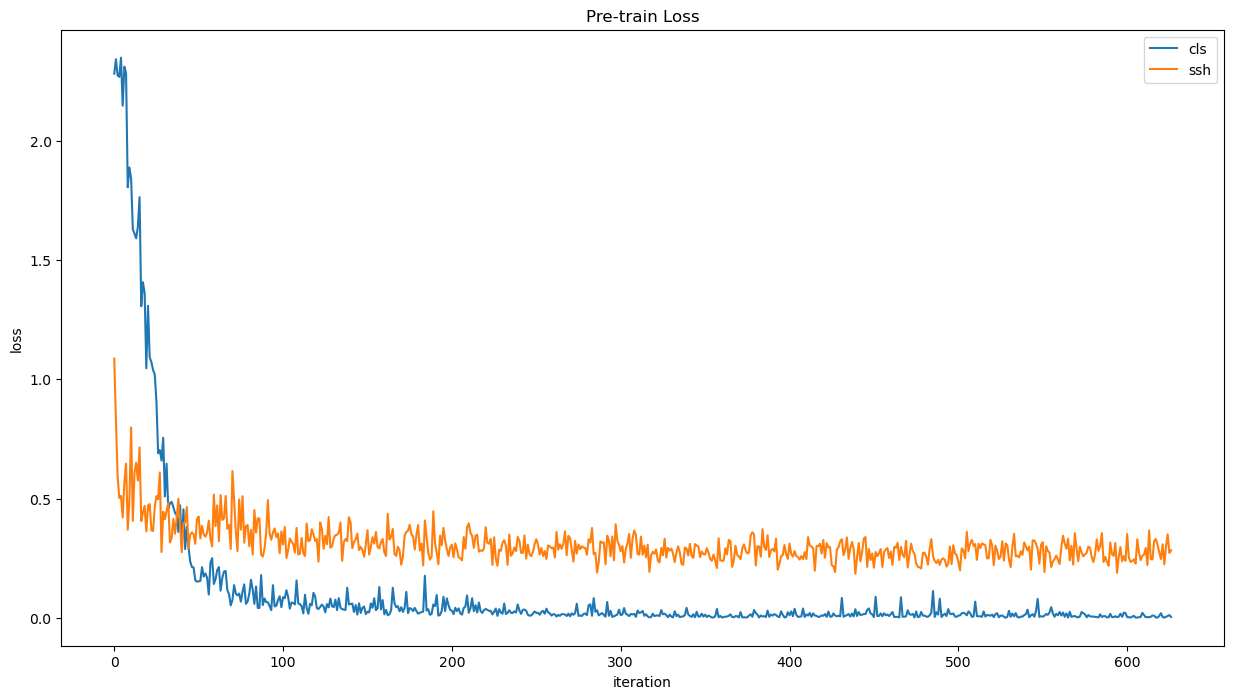

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='cls')
plt.plot(val_record['step'], val_record['loss'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test dataset accuracy comparing

In [37]:
accu_record1 = pd.read_csv('./result/audio-mnist/cnn/analysis/accuracy_records.csv')
accu_record2 = pd.read_csv('./result/audio-mnist/ttt/analysis/accuracy_record.csv')
accu_record = pd.concat([accu_record1, accu_record2], axis=0)
accu_record = accu_record.fillna('N/A')
accu_record

,Unnamed: 0,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level
0,0,audio-mnist,cnn,N/A,N/A,94.78,5.22,0.0000
1,1,audio-mnist,cnn,N/A,gaussian_noise,33.41,66.59,0.0025
2,2,audio-mnist,cnn,Tent Adaptation,gaussian_noise,84.41,15.59,0.0025
3,3,audio-mnist,cnn,Norm Adaptation,gaussian_noise,83.38,16.62,0.0025
0,0,audio-mnist,RestNet,N/A,N/A,89.65,10.35,0.0000
1,1,audio-mnist,RestNet,N/A,gaussian_noise,36.39,63.61,0.0025


In [38]:
accu_record[accu_record['tta-operation'] == 'N/A']

,Unnamed: 0,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level
0,0,audio-mnist,cnn,N/A,N/A,94.78,5.22,0.0000
1,1,audio-mnist,cnn,N/A,gaussian_noise,33.41,66.59,0.0025
0,0,audio-mnist,RestNet,N/A,N/A,89.65,10.35,0.0000
1,1,audio-mnist,RestNet,N/A,gaussian_noise,36.39,63.61,0.0025
